In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
import folium
from folium.plugins import HeatMap
import plotly.express as px

from tensorflow.keras.utils import to_categorical ##for ANN
import keras
from keras.layers import Dense
from keras.models import Sequential


plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 32) ## all columns in this dataset will be showed.

In [2]:
data=pd.read_csv('hotel_bookings.csv',parse_dates=['reservation_status_date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [3]:
data.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [4]:
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [5]:
data.shape[0]

119390

In [6]:
## checking NaN value 
null=pd.DataFrame({'num of null':data.isnull().sum(),'percentage of null value':data.isnull().sum()/data.shape[0]})
null

num of null  percentage of null value
hotel                                     0                  0.000000
is_canceled                               0                  0.000000
lead_time                                 0                  0.000000
arrival_date_year                         0                  0.000000
arrival_date_month                        0                  0.000000
arrival_date_week_number                  0                  0.000000
arrival_date_day_of_month                 0                  0.000000
stays_in_weekend_nights                   0                  0.000000
stays_in_week_nights                      0                  0.000000
adults                                    0                  0.000000
children                                  4                  0.000034
babies                                    0                  0.000000
meal                                      0                  0.000000
country                                 488                  0.004087
market_segment                            0                  0.000000
distribution_channel                      0                  0.000000
is_repeated_guest                         0                  0.000000
previous_cancellations                    0                  0.000000
previous_bookings_not_canceled            0                  0.000000
reserved_room_type                        0                  0.000000
assigned_room_type                        0                  0.000000
booking_changes                           0                  0.000000
deposit_type                              0                  0.000000
agent                                 16340                  0.136862
company                              112593                  0.943069
days_in_waiting_list                      0                  0.000000
customer_type                             0                  0.000000
adr                                       0                  0.000000
required_car_parking_spaces               0                  0.000000
total_of_special_requests                 0                  0.000000
reservation_status                        0                  0.000000
reservation_status_date                   0                  0.000000

In [7]:
## fill null value with 0 and check
data.fillna(0,inplace=True)
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [8]:
##the number Of adult ,children and babies can be 0 at the same time
filter=(data['adults']==0)&(data['children']==0)&(data['babies']==0)
data[filter].shape##  180 pieces of data is questionable,remove this data
data[filter]

hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
2409    Resort Hotel            0          0               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
...              ...          ...        ...                ...   
115029    City Hotel            0        107               2017   
115091    City Hotel            0          1               2017   
116251    City Hotel            0         44               2017   
116534    City Hotel            0          2               2017   
117087    City Hotel            0        170               2017   

       arrival_date_month  arrival_date_week_number  \
2224              October                        41   
2409              October                        42   
3181             November                        47   
3684             December                        53   
3708             December                        53   
...                   ...                       ...   
115029               June                        26   
115091               June                        26   
116251               July                        28   
116534               July                        28   
117087               July                        30   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2224                            6                        0   
2409                           12                        0   
3181                           20                        1   
3684                           30                        1   
3708                           30                        2   
...                           ...                      ...   
115029                         27                        0   
115091                         30                        0   
116251                         15                        1   
116534                         15                        2   
117087                         27                        0   

        stays_in_week_nights  adults  children  babies meal country  \
2224                       3       0       0.0       0   SC     PRT   
2409                       0       0       0.0       0   SC     PRT   
3181                       2       0       0.0       0   SC     ESP   
3684                       4       0       0.0       0   SC     PRT   
3708                       4       0       0.0       0   SC     PRT   
...                      ...     ...       ...     ...  ...     ...   
115029                     3       0       0.0       0   BB     CHE   
115091                     1       0       0.0       0   SC     PRT   
116251                     1       0       0.0       0   SC     SWE   
116534                     5       0       0.0       0   SC     RUS   
117087                     2       0       0.0       0   BB     BRA   

       market_segment distribution_channel  is_repeated_guest  \
2224        Corporate            Corporate                  0   
2409        Corporate            Corporate                  0   
3181           Groups                TA/TO                  0   
3684           Groups                TA/TO                  0   
3708           Groups                TA/TO                  0   
...               ...                  ...                ...   
115029      Online TA                TA/TO                  0   
115091  Complementary               Direct                  0   
116251      Online TA                TA/TO                  0   
116534      Online TA                TA/TO                  0   
117087  Offline TA/TO                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
2224                         0                               0   
2409                         0        

<span style="font-size:40px;">2.EDA:Exploratory Data Analysis<span>

<span style="font-size:40px;">2.1 From where the most guests are coming ?<span>

In [9]:
cancel_filter=((data['is_canceled']==1)|(data['reservation_status']=='Canceled'))

In [10]:
cancel_rate=data[cancel_filter].shape[0]/data.shape[0]
cancel_rate

0.37041628277075134

In [11]:
guest_no_gy_country=data[~cancel_filter]['country'].value_counts().reset_index()
guest_no_gy_country.columns=['country','no of guest']
guest_no_gy_country

country  no of guest
0       PRT        21071
1       GBR         9676
2       FRA         8481
3       ESP         6391
4       DEU         6069
..      ...          ...
161     BHR            1
162     DJI            1
163     MLI            1
164     NPL            1
165     FRO            1

[166 rows x 2 columns]

In [12]:
## visualization
basemap=folium.Map()
guests_map=px.choropleth(guest_no_gy_country,locations=guest_no_gy_country['country'],
                         color=guest_no_gy_country['no of guest'],hover_name=guest_no_gy_country['country'])
guests_map.show()

<span style="font-size:20px;">Conclusion:Guests come from almost all over the world and mainly come from Protugal,England,and France <span>

<span style="font-size:40px;">2.2 How much do guests pay for a room per night? & How does the price vary per night over the year? <span>

In [13]:
data_remove_cancelled=data[~filter]

In [14]:
#adr - Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
avg_price=data_remove_cancelled['adr'].agg('mean')
avg_price

101.96909177082223

In [15]:
avg_price_gy_hotel=data_remove_cancelled.groupby('hotel')['adr'].agg('mean')
avg_price_gy_arrival_date_year=data_remove_cancelled.groupby('arrival_date_year')['adr'].agg('mean')
avg_price_gy_deposit_type=data_remove_cancelled.groupby('deposit_type')['adr'].agg('mean')
avg_price_gy_customer_type=data_remove_cancelled.groupby('customer_type')['adr'].agg('mean')
print(avg_price_gy_arrival_date_year,avg_price_gy_customer_type,avg_price_gy_deposit_type,avg_price_gy_hotel)

arrival_date_year
2015     87.293332
2016     98.450010
2017    114.811125
Name: adr, dtype: float64 customer_type
Contract            87.635639
Group               83.913780
Transient          107.158919
Transient-Party     86.199186
Name: adr, dtype: float64 deposit_type
No Deposit    103.685436
Non Refund     89.964017
Refundable     76.209753
Name: adr, dtype: float64 hotel
City Hotel      105.503191
Resort Hotel     94.983054
Name: adr, dtype: float64


In [73]:
data_remove_cancelled.drop(data_remove_cancelled.sort_values(by='adr', ascending=False)['adr'].index[0],inplace=True)


<AxesSubplot:xlabel='arrival_date_year', ylabel='adr'>

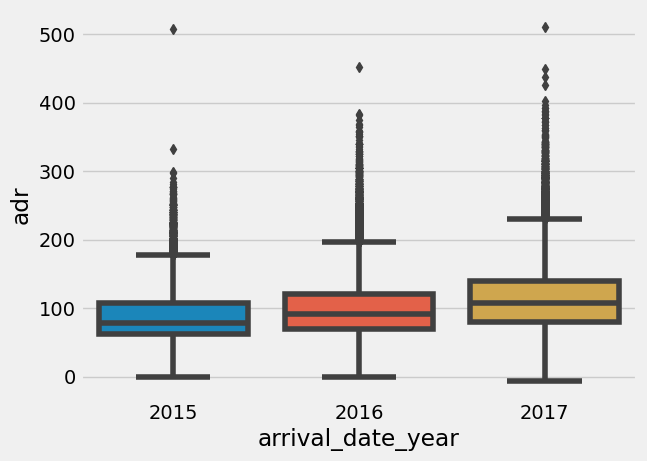

In [74]:
sns.boxplot(data_remove_cancelled,x='arrival_date_year',y='adr')

<AxesSubplot:xlabel='hotel', ylabel='adr'>

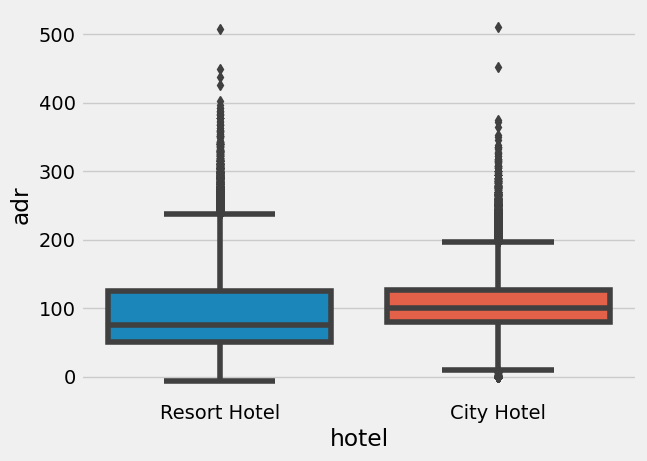

In [75]:
sns.boxplot(data_remove_cancelled,x='hotel',y='adr')

<AxesSubplot:xlabel='assigned_room_type', ylabel='adr'>

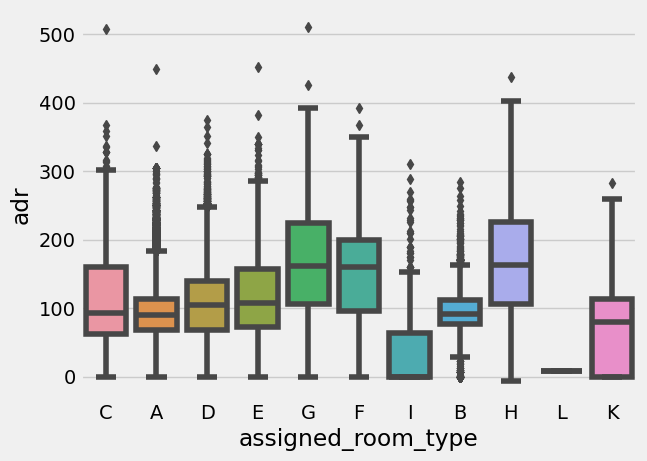

In [76]:
sns.boxplot(data_remove_cancelled,x='assigned_room_type',y='adr')

<AxesSubplot:xlabel='assigned_room_type', ylabel='adr'>

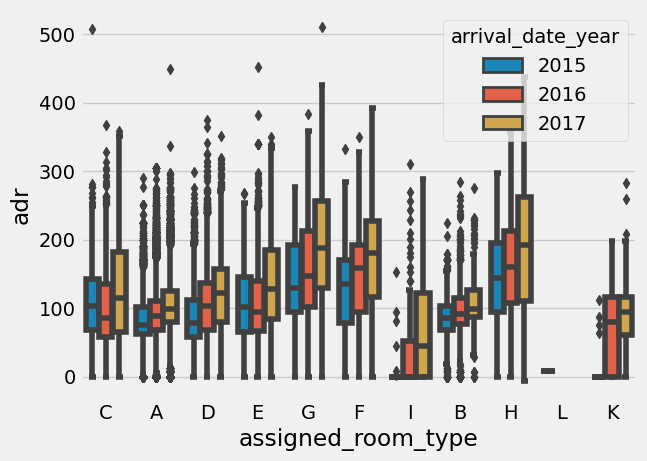

In [77]:
sns.boxplot(data_remove_cancelled,x='assigned_room_type',y='adr',hue='arrival_date_year')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

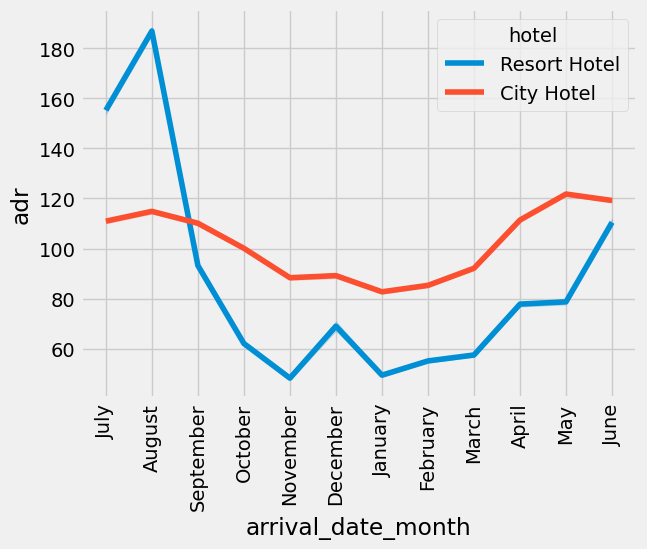

In [78]:
sns.lineplot(data=data_remove_cancelled,x='arrival_date_month',y='adr',hue='hotel')
plt.xticks(rotation=90)

<span style="font-size:20px;">Conclusion:Guests cost 102 on average for every night in hotel.Hotel price increase along the time from 87 Euro per night in 2015 to 115 per night in 2017. City hotel costs literally higher than resort hotel on average , but resort hotel's price has a larger range.House price on August is highest during the year<span>

<span style="font-size:40px;">2.3 Which are the most busy months? <span>

In [22]:
data_by_month=data_remove_cancelled['arrival_date_month'].value_counts().reset_index()
data_by_month

index  arrival_date_month
0      August               13861
1        July               12644
2         May               11780
3     October               11147
4       April               11078
5        June               10929
6   September               10500
7       March                9768
8    February                8052
9    November                6771
10   December                6759
11    January                5921

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'July'),
  Text(1, 0, 'August'),
  Text(2, 0, 'September'),
  Text(3, 0, 'October'),
  Text(4, 0, 'November'),
  Text(5, 0, 'December'),
  Text(6, 0, 'January'),
  Text(7, 0, 'February'),
  Text(8, 0, 'March'),
  Text(9, 0, 'April'),
  Text(10, 0, 'May'),
  Text(11, 0, 'June')])

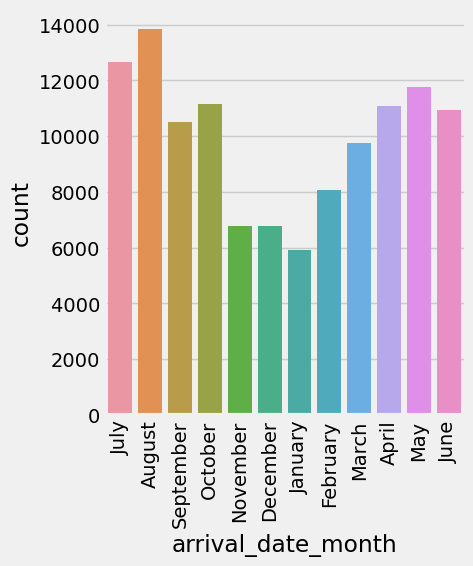

In [23]:
sns.catplot(x='arrival_date_month',data=data_remove_cancelled,kind='count')
plt.xticks(rotation=90)

<span style="font-size:20px;">Conclusion:The most busy month is August.People prefer to go on trip on autumn<span>

<span style="font-size:40px;">2.4 How long do people stay at the hotels?<span>

In [24]:
data_remove_cancelled['day_of_stay']=data_remove_cancelled['stays_in_weekend_nights']+data_remove_cancelled['stays_in_week_nights']
data_remove_cancelled.describe()['day_of_stay'] ## strong outlier

count    119210.000000
mean          3.426248
std           2.540692
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: day_of_stay, dtype: float64

<AxesSubplot:xlabel='the day of stay'>

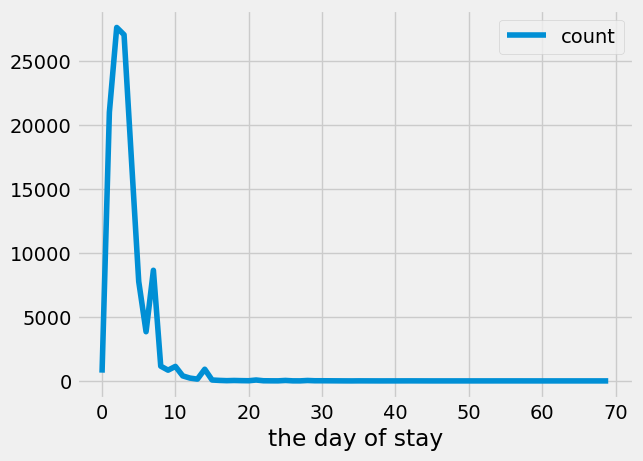

In [25]:
day_stay_df=data_remove_cancelled['day_of_stay'].value_counts().reset_index()
day_stay_df.columns=['the day of stay','count']
day_stay_df.sort_values(by='the day of stay').plot(x='the day of stay',y='count',kind='line')


In [26]:
stay=data_remove_cancelled.groupby(['day_of_stay','hotel']).count().reset_index()
stay=stay.iloc[:,0:3]
stay=stay.rename(columns={'is_canceled':'Number of stays'})
px.bar(data_frame=stay,x='day_of_stay',y='Number of stays',color='hotel',template='plotly_dark',barmode='group')

<span style="font-size:20px;">Conclusion:Most of people stays in hotel within 10 days<span>

<span style="font-size:40px;">3.Data Pre Processing<span>

<span style="font-size:20px;">We want to forcast what kind of booking will be canceled<span>

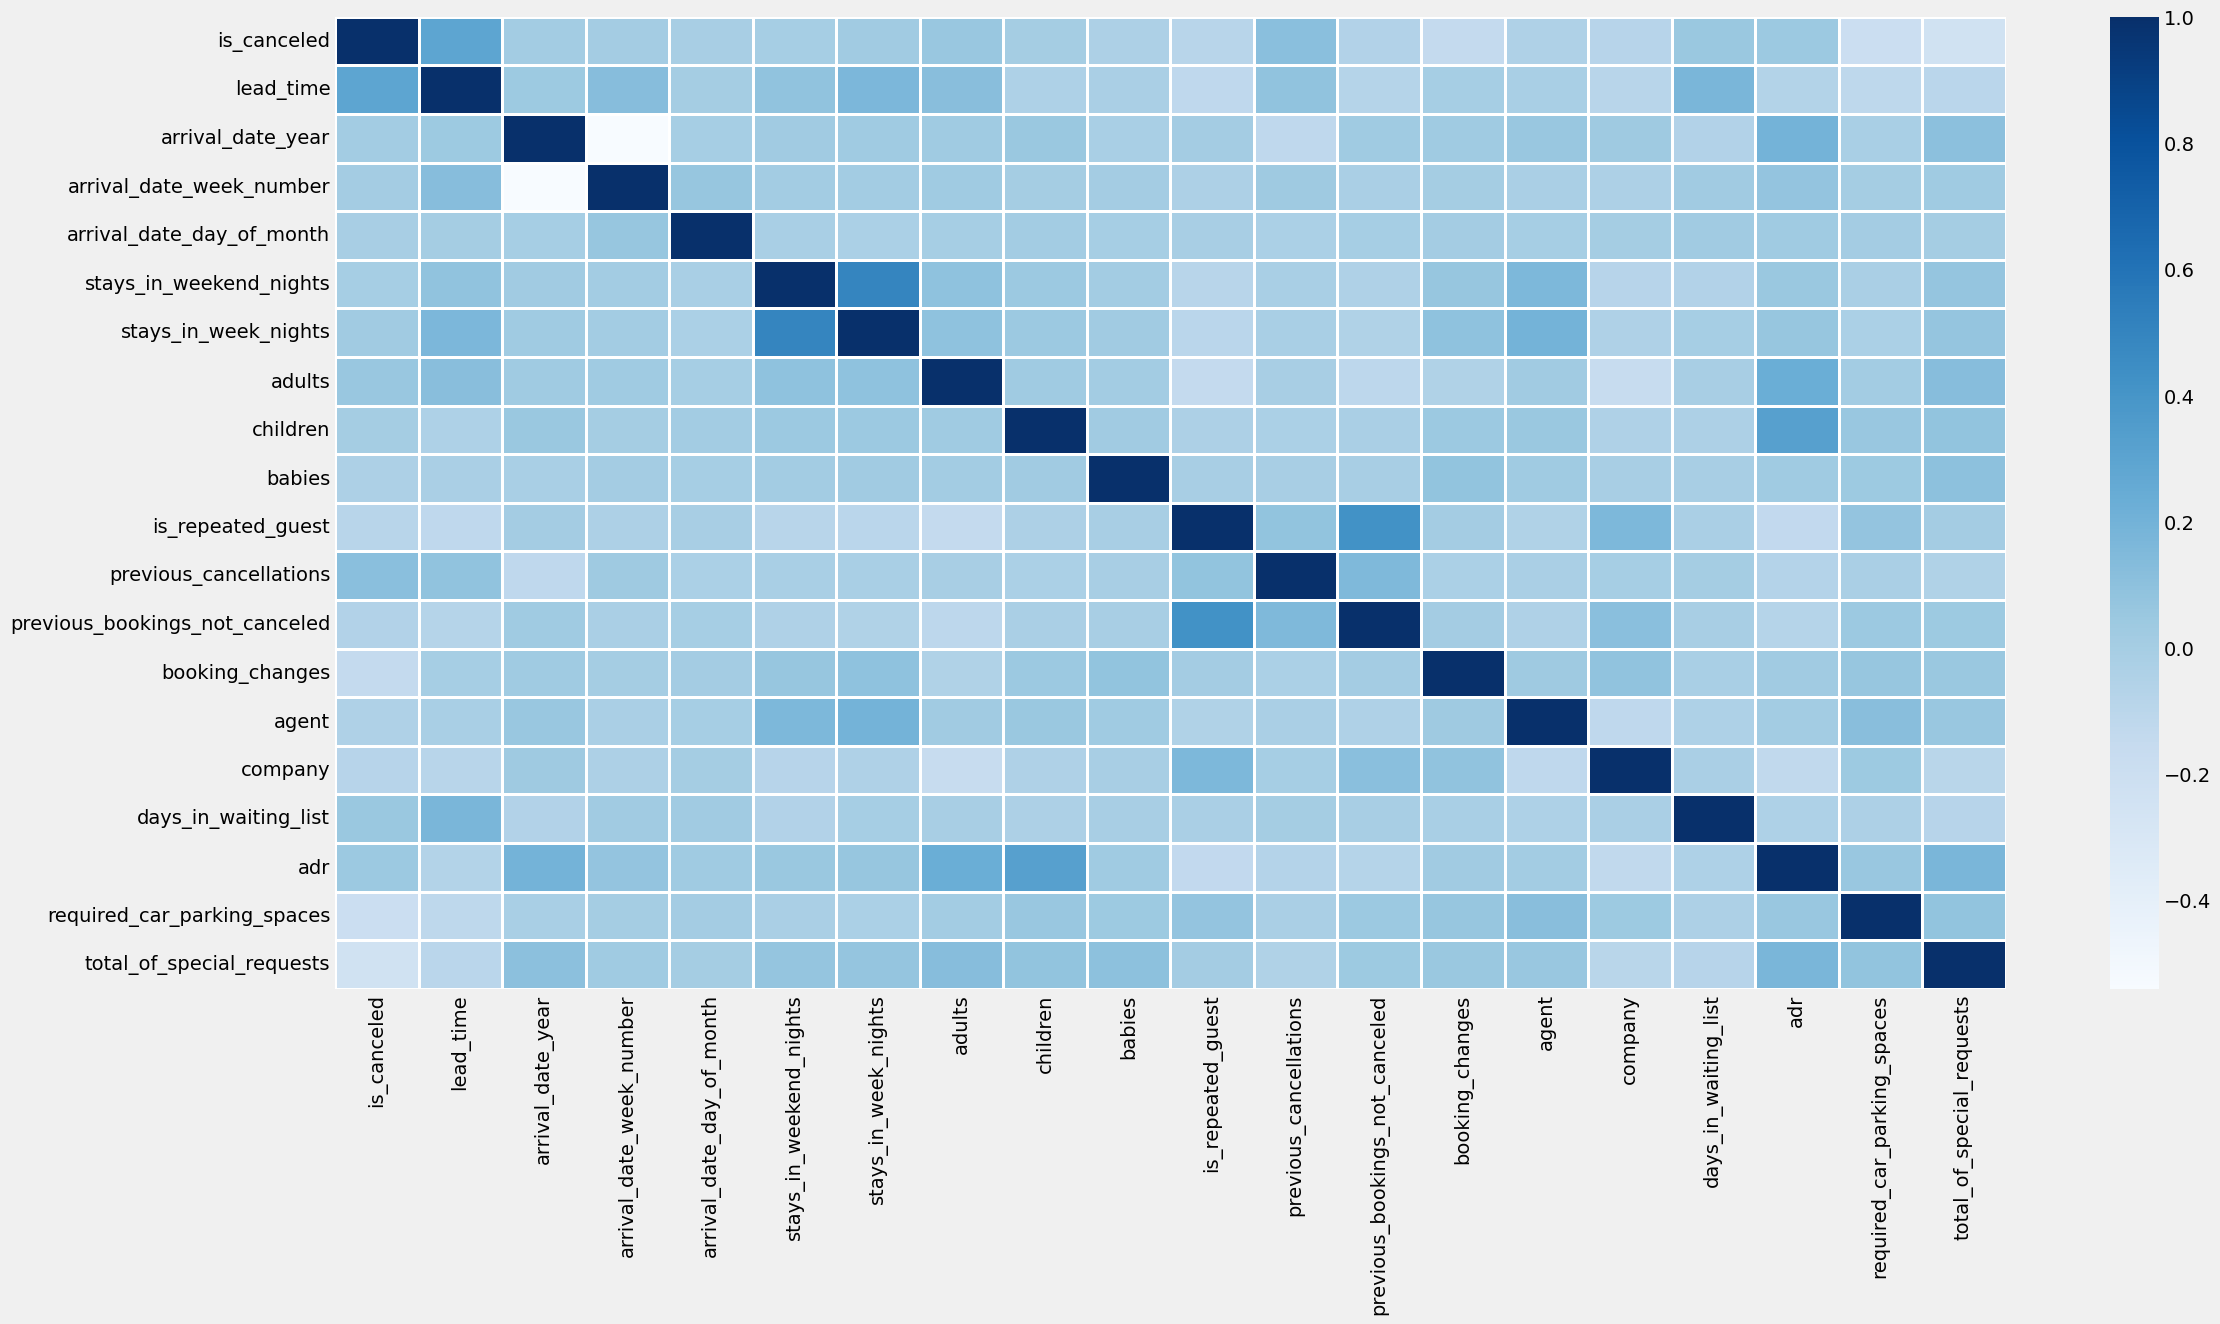

In [27]:
plt.figure(figsize=(24,12))
corr_matrix=data.corr()
sns.heatmap(corr_matrix,cmap='Blues',linewidths=1)
plt.show()

<span style="font-size:20px;">Precondition of corr is linear relation.We need to check it at first.Besides,column with lower correlation with column'is-cancaled' should be dropped <span>

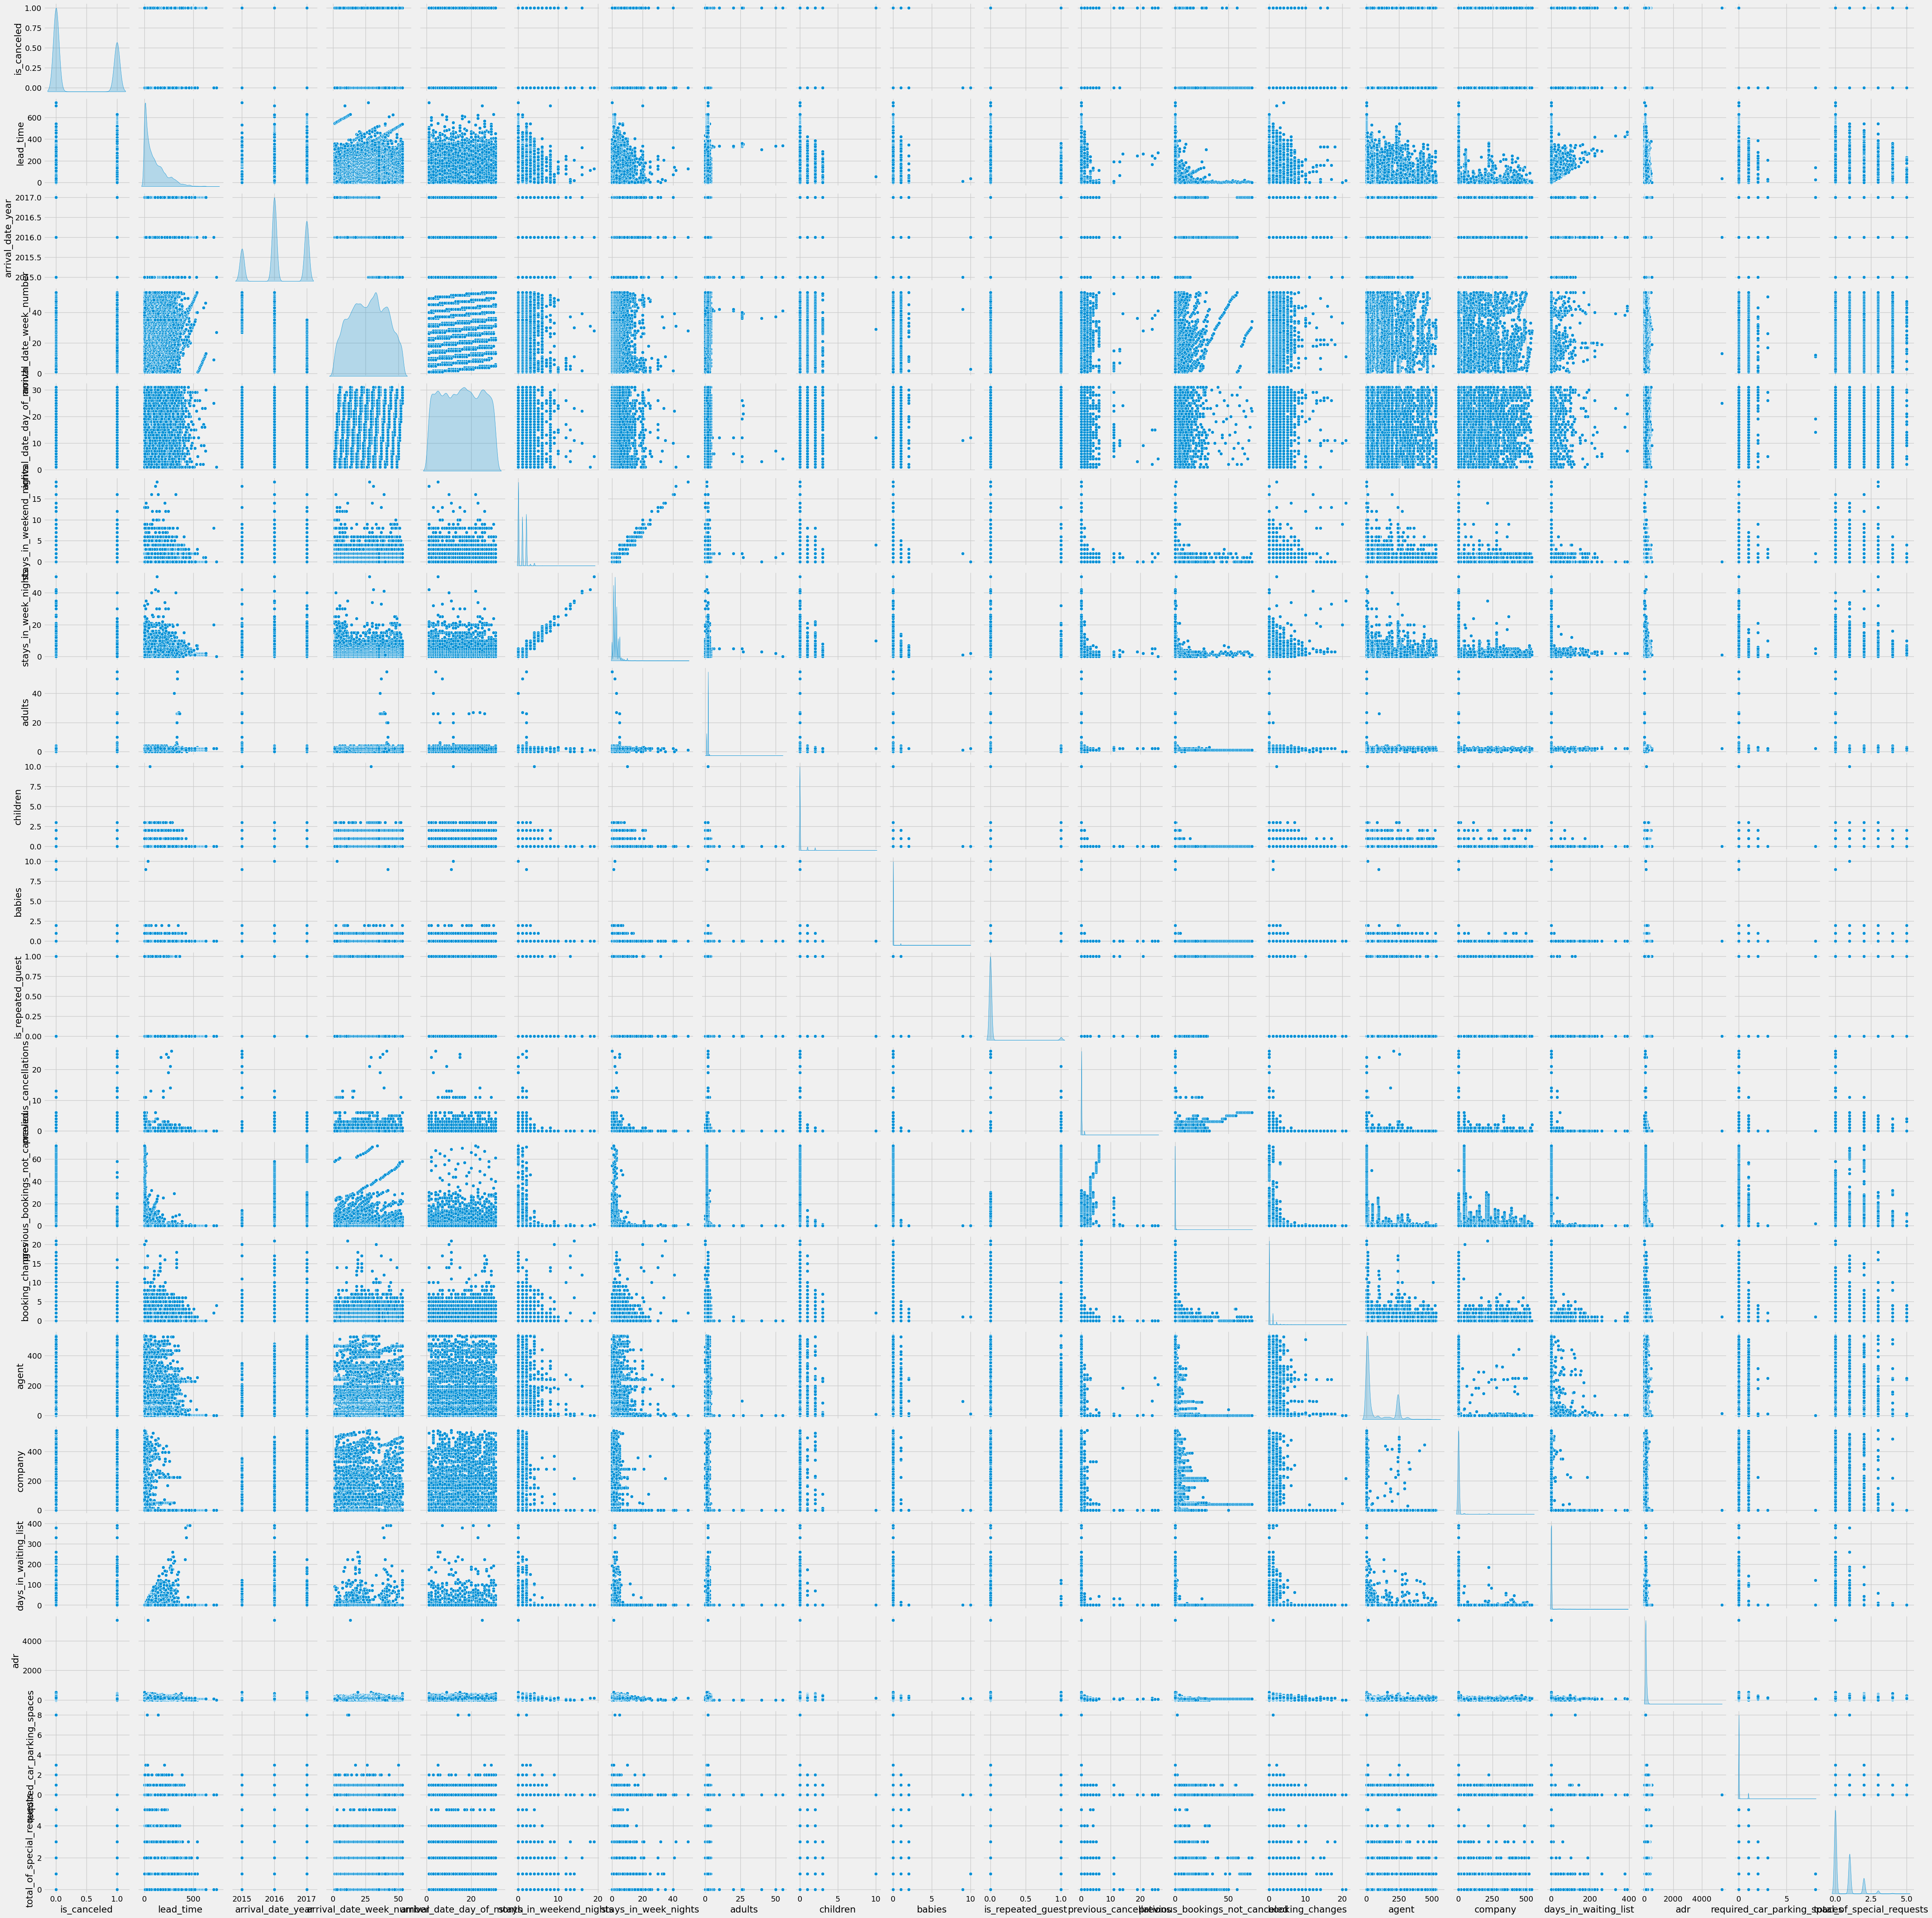

In [28]:
sns.pairplot(data,diag_kind='kde')
plt.xticks(rotation=45)
plt.show()

In [29]:
corr_matrix['is_canceled'].abs().sort_values(ascending=False)
## drop the column which correlation is lower than 0.02

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
company                           0.082995
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
agent                             0.046529
babies                            0.032491
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005036
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

In [30]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [31]:
#reason:['stays_in_weekend_nights','children','arrival_date_day_of_month','arrival_date_week_number',
#'arrival_date_year']---too low correlation
#company--large number of null   94%
#'reservation_status'--strong collinearity
#days_in_waiting_list   most of them is 0,long waiting time implies unusual orders.
#select ‘reserved_room_type' instead of 'assigned_room_type'
low_related_columns=['days_in_waiting_list', 'arrival_date_year', 'assigned_room_type',
                     'booking_changes','reservation_status', 'country', 'days_in_waiting_list']

In [32]:
data.drop(low_related_columns,axis=1,inplace=True)

In [33]:
data.head()

hotel  is_canceled  lead_time arrival_date_month  \
0  Resort Hotel            0        342               July   
1  Resort Hotel            0        737               July   
2  Resort Hotel            0          7               July   
3  Resort Hotel            0         13               July   
4  Resort Hotel            0         14               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal market_segment distribution_channel  is_repeated_guest  \
0   BB         Direct               Direct                  0   
1   BB         Direct               Direct                  0   
2   BB         Direct               Direct                  0   
3   BB      Corporate            Corporate                  0   
4   BB      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  deposit_type  agent  company customer_type   adr  \
0   No Deposit    0.0      0.0     Transient   0.0   
1   No Deposit    0.0      0.0     Transient   0.0   
2   No Deposit    0.0      0.0     Transient  75.0   
3   No Deposit  304.0      0.0     Transient  75.0   
4   No Deposit  240.0      0.0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          1   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03

In [34]:
data.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
deposit_type                              object
agent                                    float64
company             

In [35]:
cat_cols=[n for n in data.columns if data[n].dtype=='object']
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type']

In [36]:
cat_df=data[cat_cols]
cat_df

hotel arrival_date_month meal market_segment  \
0       Resort Hotel               July   BB         Direct   
1       Resort Hotel               July   BB         Direct   
2       Resort Hotel               July   BB         Direct   
3       Resort Hotel               July   BB      Corporate   
4       Resort Hotel               July   BB      Online TA   
...              ...                ...  ...            ...   
119385    City Hotel             August   BB  Offline TA/TO   
119386    City Hotel             August   BB      Online TA   
119387    City Hotel             August   BB      Online TA   
119388    City Hotel             August   BB      Online TA   
119389    City Hotel             August   HB      Online TA   

       distribution_channel reserved_room_type deposit_type customer_type  
0                    Direct                  C   No Deposit     Transient  
1                    Direct                  C   No Deposit     Transient  
2                    Direct                  A   No Deposit     Transient  
3                 Corporate                  A   No Deposit     Transient  
4                     TA/TO                  A   No Deposit     Transient  
...                     ...                ...          ...           ...  
119385                TA/TO                  A   No Deposit     Transient  
119386                TA/TO                  E   No Deposit     Transient  
119387                TA/TO                  D   No Deposit     Transient  
119388                TA/TO                  A   No Deposit     Transient  
119389                TA/TO                  A   No Deposit     Transient  

[119390 rows x 8 columns]

In [37]:
## print unique value of categorical variable
for columns in cat_cols:
    print("{}:\n {}\n".format(columns,cat_df[columns].unique()))
    

hotel:
 ['Resort Hotel' 'City Hotel']

arrival_date_month:
 ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

meal:
 ['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment:
 ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel:
 ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type:
 ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']

deposit_type:
 ['No Deposit' 'Refundable' 'Non Refund']

customer_type:
 ['Transient' 'Contract' 'Transient-Party' 'Group']



In [38]:
##encoding categorical data
cat_df['hotel']=cat_df['hotel'].map({'Resort Hotel':0,'City Hotel':1})
cat_df['arrival_date_month']=cat_df['arrival_date_month'].map({'July':7,'August':8,'September':9,'October':10,
                                                               'November':11,'December':12,'January':1,'February':2,
                                                               'March':3, 'April':4, 'May':5,'June':6})
cat_df['meal']=cat_df['meal'].map({'BB':0,'FB':1,'HB':2,'SC':3,'Undefined':4})
cat_df['market_segment']=cat_df['market_segment'].map({'Direct':0,'Corporate':1,'Online TA':2,'Offline TA/TO':3,
                                                       'Complementary':4,'Groups':5,'Undefined':6,'Aviation':7})
cat_df['distribution_channel']=cat_df['distribution_channel'].map({'Direct':0,'Corporate':1,'TA/TO':2,'Undefined':3,
                                                                   'GDS':4})
cat_df['reserved_room_type']=cat_df['reserved_room_type'].map({'C':0, 'A':1,'D':2,'E':3,'G':4,'F':5,'H':6,'L':7,
                                                               'P':8,'B':9})
cat_df['deposit_type']=cat_df['deposit_type'].map({'No Deposit':0,'Refundable':1,'Non Refund':2})
cat_df['customer_type']=cat_df['customer_type'].map({'Transient':0,'Contract':1,'Transient-Party':2,'Group':3})


In [39]:
cat_df.head()

hotel  arrival_date_month  meal  market_segment  distribution_channel  \
0      0                   7     0               0                     0   
1      0                   7     0               0                     0   
2      0                   7     0               0                     0   
3      0                   7     0               1                     1   
4      0                   7     0               2                     2   

   reserved_room_type  deposit_type  customer_type  
0                   0             0              0  
1                   0             0              0  
2                   1             0              0  
3                   1             0              0  
4                   1             0              0

In [40]:
num_df=data.drop(columns=cat_cols,axis=1)
num_df.head()

is_canceled  lead_time  arrival_date_week_number  \
0            0        342                        27   
1            0        737                        27   
2            0          7                        27   
3            0         13                        27   
4            0         14                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies  is_repeated_guest  previous_cancellations  \
0       2       0.0       0                  0                       0   
1       2       0.0       0                  0                       0   
2       1       0.0       0                  0                       0   
3       1       0.0       0                  0                       0   
4       2       0.0       0                  0                       0   

   previous_bookings_not_canceled  agent  company   adr  \
0                               0    0.0      0.0   0.0   
1                               0    0.0      0.0   0.0   
2                               0    0.0      0.0  75.0   
3                               0  304.0      0.0  75.0   
4                               0  240.0      0.0  98.0   

   required_car_parking_spaces  total_of_special_requests  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          1   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03

In [41]:
num_df['year']=num_df['reservation_status_date'].dt.year
num_df['month']=num_df['reservation_status_date'].dt.month
num_df['day']=num_df['reservation_status_date'].dt.day

In [42]:
num_df.drop(columns='reservation_status_date',axis=1,inplace=True)

In [43]:
num_df.head()

is_canceled  lead_time  arrival_date_week_number  \
0            0        342                        27   
1            0        737                        27   
2            0          7                        27   
3            0         13                        27   
4            0         14                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies  is_repeated_guest  previous_cancellations  \
0       2       0.0       0                  0                       0   
1       2       0.0       0                  0                       0   
2       1       0.0       0                  0                       0   
3       1       0.0       0                  0                       0   
4       2       0.0       0                  0                       0   

   previous_bookings_not_canceled  agent  company   adr  \
0                               0    0.0      0.0   0.0   
1                               0    0.0      0.0   0.0   
2                               0    0.0      0.0  75.0   
3                               0  304.0      0.0  75.0   
4                               0  240.0      0.0  98.0   

   required_car_parking_spaces  total_of_special_requests  year  month  day  
0                            0                          0  2015      7    1  
1                            0                          0  2015      7    1  
2                            0                          0  2015      7    2  
3                            0                          0  2015      7    2  
4                            0                          1  2015      7    3

In [44]:
num_df['year'].unique()

array([2015, 2014, 2016, 2017])

In [45]:
num_df['year']=num_df['year'].map({2015:0,2014:1,2016:2,2017:3})

In [46]:
num_df.head()

is_canceled  lead_time  arrival_date_week_number  \
0            0        342                        27   
1            0        737                        27   
2            0          7                        27   
3            0         13                        27   
4            0         14                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies  is_repeated_guest  previous_cancellations  \
0       2       0.0       0                  0                       0   
1       2       0.0       0                  0                       0   
2       1       0.0       0                  0                       0   
3       1       0.0       0                  0                       0   
4       2       0.0       0                  0                       0   

   previous_bookings_not_canceled  agent  company   adr  \
0                               0    0.0      0.0   0.0   
1                               0    0.0      0.0   0.0   
2                               0    0.0      0.0  75.0   
3                               0  304.0      0.0  75.0   
4                               0  240.0      0.0  98.0   

   required_car_parking_spaces  total_of_special_requests  year  month  day  
0                            0                          0     0      7    1  
1                            0                          0     0      7    1  
2                            0                          0     0      7    2  
3                            0                          0     0      7    2  
4                            0                          1     0      7    3

<span style="font-size:20px;">logarithmic transformation--handle outlier <span>

In [47]:
num_df.var()

is_canceled                           0.233210
lead_time                         11419.721511
arrival_date_week_number            185.099790
arrival_date_day_of_month            77.102966
stays_in_weekend_nights               0.997229
stays_in_week_nights                  3.641554
adults                                0.335543
children                              0.158846
babies                                0.009494
is_repeated_guest                     0.030894
previous_cancellations                0.712904
previous_bookings_not_canceled        2.242317
agent                             11479.398119
company                            2909.942594
adr                                2553.866100
required_car_parking_spaces           0.060168
total_of_special_requests             0.628529
year                                  1.129424
month                                11.198071
day                                  77.060870
dtype: float64

In [48]:
## normalizing numeric columns
num_df['lead_time']=np.log(num_df['lead_time']+1)
num_df['arrival_date_week_number']=np.log(num_df['arrival_date_week_number']+1)
num_df['arrival_date_day_of_month']=np.log(num_df['arrival_date_day_of_month']+1)
num_df['agent']=np.log(num_df['agent']+1)
num_df['company']=np.log(num_df['company']+1)
num_df['adr']=np.log(num_df['adr']+1)
num_df['day']=np.log(num_df['day']+1)
num_df['month']=np.log(num_df['month']+1)

In [49]:
num_df.var()

is_canceled                       0.233210
lead_time                         2.591420
arrival_date_week_number          0.441039
arrival_date_day_of_month         0.506267
stays_in_weekend_nights           0.997229
stays_in_week_nights              3.641554
adults                            0.335543
children                          0.158846
babies                            0.009494
is_repeated_guest                 0.030894
previous_cancellations            0.712904
previous_bookings_not_canceled    2.242317
agent                             3.536189
company                           1.350926
adr                               0.540353
required_car_parking_spaces       0.060168
total_of_special_requests         0.628529
year                              1.129424
month                             0.308712
day                               0.523909
dtype: float64

In [50]:
num_df.isnull().sum()

is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
agent                             0
company                           0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
year                              0
month                             0
day                               0
dtype: int64

In [51]:
num_df['adr']=num_df['adr'].fillna(value=num_df['adr'].mean())

In [52]:
num_df.isnull().sum()

is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
agent                             0
company                           0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
year                              0
month                             0
day                               0
dtype: int64

In [53]:
num_df.drop(columns='is_canceled',axis=1,inplace=True)

In [54]:
num_df.head()

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
0   5.837730                  3.332205                   0.693147   
1   6.603944                  3.332205                   0.693147   
2   2.079442                  3.332205                   0.693147   
3   2.639057                  3.332205                   0.693147   
4   2.708050                  3.332205                   0.693147   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0                  0                       0                               0   
1                  0                       0                               0   
2                  0                       0                               0   
3                  0                       0                               0   
4                  0                       0                               0   

      agent  company       adr  required_car_parking_spaces  \
0  0.000000      0.0  0.000000                            0   
1  0.000000      0.0  0.000000                            0   
2  0.000000      0.0  4.330733                            0   
3  5.720312      0.0  4.330733                            0   
4  5.484797      0.0  4.595120                            0   

   total_of_special_requests  year     month       day  
0                          0     0  2.079442  0.693147  
1                          0     0  2.079442  0.693147  
2                          0     0  2.079442  1.098612  
3                          0     0  2.079442  1.098612  
4                          1     0  2.079442  1.386294

In [55]:
X=pd.concat([num_df,cat_df],axis=1)
y=data['is_canceled']

In [56]:
X.shape,y.shape

((119390, 27), (119390,))

In [57]:
#spilting data into training set and test set
X_trained,X_test,y_trained,y_test=train_test_split(X,y,test_size=0.3)

In [58]:
X_trained.head()

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
74386    5.648974                  3.465736                   3.332205   
114836   5.631212                  3.258097                   3.218876   
14366    0.693147                  2.944439                   3.218876   
97900    5.075174                  3.688879                   2.995732   
7611     5.123964                  3.555348                   2.833213   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
74386                         1                     1       2       0.0   
114836                        2                     1       2       0.0   
14366                         1                     0       2       0.0   
97900                         1                     2       2       0.0   
7611                          0                     5       3       0.0   

        babies  is_repeated_guest  previous_cancellations  \
74386        0                  0                       1   
114836       0                  0                       0   
14366        0                  0                       0   
97900        0                  0                       0   
7611         0                  0                       0   

        previous_bookings_not_canceled     agent  company       adr  \
74386                                0  0.693147      0.0  4.143135   
114836                               0  2.302585      0.0  5.025195   
14366                                3  0.000000      0.0  4.276666   
97900                                0  5.484797      0.0  4.976734   
7611                                 0  5.283204      0.0  4.882802   

        required_car_parking_spaces  total_of_special_requests  year  \
74386                             0                          0     0   
114836                            0                          2     3   
14366                             1                          0     2   
97900                             0                          0     2   
7611                              0                          0     2   

           month       day  hotel  arrival_date_month  meal  market_segment  \
74386   0.693147  0.693147      1                   7     0               5   
114836  1.945910  3.332205      1                   6     2               2   
14366   1.609438  3.258097      0                   4     0               1   
97900   2.302585  3.135494      1                   9     0               3   
7611    1.386294  2.197225      0                   8     0               3   

        distribution_channel  reserved_room_type  deposit_type  customer_type  
74386                      2                   1             2              1  
114836                     2                   1             0              0  
14366                      1                   1             0              0  
97900                      2                   1             0              2  
7611                       2                   2             0              0

In [59]:
X_test.head()

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
43998    1.609438                  3.713572                   3.367296   
111981   4.094345                  3.044522                   2.772589   
116259   1.791759                  3.401197                   2.833213   
104234   2.397895                  1.098612                   2.197225   
3599     0.000000                  3.970292                   3.258097   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
43998                         1                     2       1       0.0   
111981                        1                     3       2       0.0   
116259                        1                     0       2       0.0   
104234                        1                     0       2       0.0   
3599                          0                     1       3       1.0   

        babies  is_repeated_guest  previous_cancellations  \
43998        0                  0                       0   
111981       0                  0                       0   
116259       0                  0                       0   
104234       0                  0                       0   
3599         0                  0                       0   

        previous_bookings_not_canceled     agent   company       adr  \
43998                                0  0.000000  4.521789  4.564348   
111981                               0  2.302585  0.000000  5.093750   
116259                               0  2.708050  0.000000  4.753590   
104234                               0  5.802118  0.000000  4.369448   
3599                                 0  5.484797  0.000000  4.753590   

        required_car_parking_spaces  total_of_special_requests  year  \
43998                             0                          1     0   
111981                            0                          3     3   
116259                            0                          0     3   
104234                            0                          2     3   
3599                              0                          0     0   

           month       day  hotel  arrival_date_month  meal  market_segment  \
43998   2.397895  0.693147      1                   9     0               1   
111981  1.791759  2.995732      1                   5     0               2   
116259  2.079442  2.890372      1                   7     0               0   
104234  0.693147  2.302585      1                   1     0               5   
3599    2.564949  3.258097      0                  12     0               2   

        distribution_channel  reserved_room_type  deposit_type  customer_type  
43998                      0                   1             0              0  
111981                     2                   1             0              0  
116259                     0                   1             0              0  
104234                     2                   2             0              2  
3599                       2                   6             2              0

In [60]:
y_trained.head()

74386     1
114836    0
14366     0
97900     0
7611      1
Name: is_canceled, dtype: int64

In [61]:
y_test.head()

43998     0
111981    0
116259    0
104234    0
3599      1
Name: is_canceled, dtype: int64

<span style="font-size:40px;">4.Modeling<span>

<span style="font-size:40px;">4.1 Logistic Regression<span>

In [82]:
lr=LogisticRegression()
lr.fit(X_trained,y_trained)
y_pred_lr=lr.predict(X_test)
acc_lr=accuracy_score(y_test,y_pred_lr)
conf=confusion_matrix(y_test,y_pred_lr)### TP TN FP FN
clf_report=classification_report(y_test,y_pred_lr)
print("Accuracy score of Logistic Regression is {}".format(acc_lr))
print("Confusioni matrix :\n{}".format(conf))
print("Classification report:\n {}".format(clf_report))


Accuracy score of Logistic Regression is 0.8181589747885083
Confusioni matrix :
[[21491  1099]
 [ 5414  7813]]
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87     22590
           1       0.88      0.59      0.71     13227

    accuracy                           0.82     35817
   macro avg       0.84      0.77      0.79     35817
weighted avg       0.83      0.82      0.81     35817



<span style="font-size:40px;">4.2 KNN<span>

In [87]:
knn=KNeighborsClassifier()
knn.fit(X_trained,y_trained)
y_pred_knn=knn.predict(X_test)
acc_knn=accuracy_score(y_test,y_pred_knn)
conf=confusion_matrix(y_test,y_pred_knn)### TP TN FP FN
clf_report=classification_report(y_test,y_pred_knn)
print("Accuracy score of KNN is {}".format(acc_knn))
print("Confusioni matrix :\n{}".format(conf))
print("Classification report:\n {}".format(clf_report))

Accuracy score of KNN is 0.8671580534383114
Confusioni matrix :
[[21185  1405]
 [ 3353  9874]]
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90     22590
           1       0.88      0.75      0.81     13227

    accuracy                           0.87     35817
   macro avg       0.87      0.84      0.85     35817
weighted avg       0.87      0.87      0.86     35817



<span style="font-size:40px;">4.3 Decision Tree Classification<span>

In [88]:
dtc=DecisionTreeClassifier()
dtc.fit(X_trained,y_trained)
y_pred_dtc=dtc.predict(X_test)
acc_dtc=accuracy_score(y_test,y_pred_dtc)
conf=confusion_matrix(y_test,y_pred_dtc)### TP TN FP FN
clf_report=classification_report(y_test,y_pred_dtc)
print("Accuracy score of Decision Tree is {}".format(acc_dtc))
print("Confusioni matrix :\n{}".format(conf))
print("Classification report:\n {}".format(clf_report))

Accuracy score of Decision Tree is 0.948851104224251
Confusioni matrix :
[[21673   917]
 [  915 12312]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     22590
           1       0.93      0.93      0.93     13227

    accuracy                           0.95     35817
   macro avg       0.95      0.95      0.95     35817
weighted avg       0.95      0.95      0.95     35817



<span style="font-size:40px;">4.4 Random Forest Classification<span>

In [95]:
rf_clf=RandomForestClassifier()
rf_clf.fit(X_trained,y_trained)
y_pred_rf_clf=rf_clf.predict(X_test)
acc_rf_clf=accuracy_score(y_test,y_pred_rf_clf)
conf=confusion_matrix(y_test,y_pred_rf_clf)### TP TN FP FN
rf_clf_report=classification_report(y_test,y_pred_rf_clf)
print("Accuracy score of Random Forest is {}".format(acc_rf_clf))
print("Confusioni matrix :\n{}".format(conf))
print("Classification report:\n {}".format(rf_clf_report))

Accuracy score of Random Forest is 0.9583158835189993
Confusioni matrix :
[[22453   137]
 [ 1356 11871]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     22590
           1       0.99      0.90      0.94     13227

    accuracy                           0.96     35817
   macro avg       0.97      0.95      0.95     35817
weighted avg       0.96      0.96      0.96     35817



<span style="font-size:40px;">4.5 Ada Boost Classification<span>

In [94]:
ada=AdaBoostClassifier(base_estimator=dtc)
ada.fit(X_trained,y_trained)
y_pred_ada=ada.predict(X_test)
acc_ada=accuracy_score(y_test,y_pred_ada)
conf=confusion_matrix(y_test,y_pred_ada)### TP TN FP FN
ada_report=classification_report(y_test,y_pred_ada)
print("Accuracy score of Ada Boost is {}".format(acc_ada))
print("Confusioni matrix :\n{}".format(conf))
print("Classification report:\n {}".format(ada_report))

Accuracy score of Ada Boost is 0.9481810313538264
Confusioni matrix :
[[21660   930]
 [  926 12301]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     22590
           1       0.93      0.93      0.93     13227

    accuracy                           0.95     35817
   macro avg       0.94      0.94      0.94     35817
weighted avg       0.95      0.95      0.95     35817



<span style="font-size:40px;">4.6 Gradient Boosting Classification<span>

In [93]:
gb=GradientBoostingClassifier()
gb.fit(X_trained,y_trained)
y_pred_gb=gb.predict(X_test)
acc_gb=accuracy_score(y_test,y_pred_gb)
conf=confusion_matrix(y_test,y_pred_gb)### TP TN FP FN
gb_report=classification_report(y_test,y_pred_gb)
print("Accuracy score of Gradient Boost is {}".format(acc_gb))
print("Confusioni matrix :\n{}".format(conf))
print("Classification report:\n {}".format(gb_report))

Accuracy score of Gradient Boost is 0.9195633358461066
Confusioni matrix :
[[22454   136]
 [ 2745 10482]]
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     22590
           1       0.99      0.79      0.88     13227

    accuracy                           0.92     35817
   macro avg       0.94      0.89      0.91     35817
weighted avg       0.93      0.92      0.92     35817



<span style="font-size:40px;">4.7 XgBoost Classification<span>

In [97]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_trained, y_trained)
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
xgb_report = classification_report(y_test, y_pred_xgb)
print("Accuracy score of Gradient Boost is {}".format(acc_xgb))
print("Confusioni matrix :\n{}".format(conf))
print("Classification report:\n {}".format(xgb_report))

Accuracy score of Gradient Boost is 0.9830806600217774
Confusioni matrix :
[[22582     8]
 [  598 12629]]
Classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     22590
           1       1.00      0.95      0.98     13227

    accuracy                           0.98     35817
   macro avg       0.99      0.98      0.98     35817
weighted avg       0.98      0.98      0.98     35817



<span style="font-size:40px;">4.8 Cat Boost Classification<span>

In [98]:
cat = CatBoostClassifier(iterations=100)
cat.fit(X_trained, y_trained)
y_pred_cat = cat.predict(X_test)
acc_cat = accuracy_score(y_test, y_pred_cat)
conf = confusion_matrix(y_test, y_pred_cat)
cat_report = classification_report(y_test, y_pred_cat)
print("Accuracy score of Cat Boost is {}".format(acc_cat))
print("Confusioni matrix :\n{}".format(conf))
print("Classification report:\n {}".format(cat_report))


Learning rate set to 0.5
0:	learn: 0.4736366	total: 72.9ms	remaining: 7.22s
1:	learn: 0.4075243	total: 79.9ms	remaining: 3.91s
2:	learn: 0.3799244	total: 86.4ms	remaining: 2.79s
3:	learn: 0.3345920	total: 94.3ms	remaining: 2.26s
4:	learn: 0.3175402	total: 102ms	remaining: 1.94s
5:	learn: 0.2962729	total: 110ms	remaining: 1.72s
6:	learn: 0.2426586	total: 117ms	remaining: 1.55s
7:	learn: 0.2153933	total: 125ms	remaining: 1.44s
8:	learn: 0.1892301	total: 132ms	remaining: 1.33s
9:	learn: 0.1722140	total: 139ms	remaining: 1.25s
10:	learn: 0.1596644	total: 147ms	remaining: 1.19s
11:	learn: 0.1366226	total: 155ms	remaining: 1.14s
12:	learn: 0.1294203	total: 163ms	remaining: 1.09s
13:	learn: 0.1221421	total: 170ms	remaining: 1.05s
14:	learn: 0.1152982	total: 178ms	remaining: 1.01s
15:	learn: 0.1083590	total: 186ms	remaining: 975ms
16:	learn: 0.1070762	total: 193ms	remaining: 943ms
17:	learn: 0.1003592	total: 201ms	remaining: 916ms
18:	learn: 0.0955916	total: 210ms	remaining: 896ms
19:	learn: 0

<span style="font-size:40px;">4.9 Extra Tree Classification<span>

In [99]:
etc = ExtraTreesClassifier()
etc.fit(X_trained, y_trained)
y_pred_etc = etc.predict(X_test)
acc_etc = accuracy_score(y_test, y_pred_etc)
conf = confusion_matrix(y_test, y_pred_etc)
etc_report = classification_report(y_test, y_pred_etc)
print("Accuracy score of Extra Tree is {}".format(acc_etc))
print("Confusioni matrix :\n{}".format(conf))
print("Classification report:\n {}".format(etc_report))

Accuracy score of Extra Tree is 0.9589580366864896
Confusioni matrix :
[[22439   151]
 [ 1319 11908]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     22590
           1       0.99      0.90      0.94     13227

    accuracy                           0.96     35817
   macro avg       0.97      0.95      0.96     35817
weighted avg       0.96      0.96      0.96     35817



<span style="font-size:40px;">4.10 LGBM Classification<span>

In [100]:
lgbm=LGBMClassifier(learning_rate=1)
lgbm.fit(X_trained, y_trained)
y_pred_lgbm = lgbm.predict(X_test)
acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
conf = confusion_matrix(y_test, y_pred_lgbm)
lgbm_report = classification_report(y_test, y_pred_lgbm)
print("Accuracy score of Extra Tree is {}".format(acc_lgbm))
print("Confusioni matrix :\n{}".format(conf))
print("Classification report:\n {}".format(lgbm_report))

Accuracy score of Extra Tree is 0.9606052991596169
Confusioni matrix :
[[21865   725]
 [  686 12541]]
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     22590
           1       0.95      0.95      0.95     13227

    accuracy                           0.96     35817
   macro avg       0.96      0.96      0.96     35817
weighted avg       0.96      0.96      0.96     35817



<span style="font-size:40px;">4.11 Voting Classification<span>

In [103]:
classifiers = [('Gradient Boosting Classifier', gb), ('Cat Boost Classifier', cat), ('XGboost', xgb),  ('Decision Tree', dtc),
               ('Extra Tree', etc), ('Light Gradient', lgbm), ('Random Forest', rf_clf), ('Ada Boost', ada), ('Logistic', lr),
               ('Knn', knn)]
vc = VotingClassifier(estimators = classifiers)
vc.fit(X_trained, y_trained)

y_pred_vc = vc.predict(X_test)
acc_vtc = accuracy_score(y_test, y_pred_vc)
conf = confusion_matrix(y_test, y_pred_vc)
clf_report = classification_report(y_test, y_pred_vc)
print("Accuracy score of Voting Classification is {}".format(acc_vtc))
print("Confusioni matrix :\n{}".format(conf))
print("Classification report:\n {}".format(clf_report))

Learning rate set to 0.5
0:	learn: 0.4736366	total: 17.8ms	remaining: 1.76s
1:	learn: 0.4075243	total: 24.6ms	remaining: 1.21s
2:	learn: 0.3799244	total: 31.6ms	remaining: 1.02s
3:	learn: 0.3345920	total: 39.6ms	remaining: 950ms
4:	learn: 0.3175402	total: 46.7ms	remaining: 888ms
5:	learn: 0.2962729	total: 54.1ms	remaining: 848ms
6:	learn: 0.2426586	total: 61.4ms	remaining: 816ms
7:	learn: 0.2153933	total: 68.1ms	remaining: 783ms
8:	learn: 0.1892301	total: 75ms	remaining: 758ms
9:	learn: 0.1722140	total: 82.5ms	remaining: 742ms
10:	learn: 0.1596644	total: 89.6ms	remaining: 725ms
11:	learn: 0.1366226	total: 97.4ms	remaining: 714ms
12:	learn: 0.1294203	total: 104ms	remaining: 698ms
13:	learn: 0.1221421	total: 111ms	remaining: 685ms
14:	learn: 0.1152982	total: 120ms	remaining: 679ms
15:	learn: 0.1083590	total: 128ms	remaining: 670ms
16:	learn: 0.1070762	total: 135ms	remaining: 659ms
17:	learn: 0.1003592	total: 143ms	remaining: 651ms
18:	learn: 0.0955916	total: 151ms	remaining: 643ms
19:	le

<span style="font-size:40px;">4.12 Artificial Neural Network<span>

In [111]:
len(cat_df.columns)+len(num_df.columns)

27

In [108]:

X = pd.concat([cat_df, num_df], axis = 1)
y = to_categorical(data['is_canceled'])

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)


In [112]:


model  = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (27, )))  ##27 features input layer
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))  ## output layer ，Sigmoid applies for dummy variable.
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_history = model.fit(X_train, y_train, validation_data = (X_test, y_test),
                          epochs = 100)  
# use train set to train model and use test set to validate model,model will be trained for 100 epochs.
#优化器是用于训练神经网络的算法，它决定了如何根据模型的损失函数来更新模型的权重和偏差，以最小化损失函数。
#损失函数是用于度量模型在训练过程中预测值与真实标签之间的差距的函数。它是训练过程中的目标函数，优化器的目标是最小化这个损失函数。

Epoch 1/100
2612/2612 [==============================] - 3s 877us/step - loss: 0.3918 - accuracy: 0.8270 - val_loss: 0.3311 - val_accuracy: 0.8598
Epoch 2/100
2612/2612 [==============================] - 2s 841us/step - loss: 0.2498 - accuracy: 0.9039 - val_loss: 0.1964 - val_accuracy: 0.9293
Epoch 3/100
2612/2612 [==============================] - 2s 854us/step - loss: 0.1601 - accuracy: 0.9447 - val_loss: 0.1244 - val_accuracy: 0.9551
Epoch 4/100
2612/2612 [==============================] - 2s 877us/step - loss: 0.1155 - accuracy: 0.9615 - val_loss: 0.1446 - val_accuracy: 0.9499
Epoch 5/100
2612/2612 [==============================] - 2s 850us/step - loss: 0.0978 - accuracy: 0.9682 - val_loss: 0.0835 - val_accuracy: 0.9786
Epoch 6/100
2612/2612 [==============================] - 2s 838us/step - loss: 0.0834 - accuracy: 0.9723 - val_loss: 0.0836 - val_accuracy: 0.9742
Epoch 7/100
2612/2612 [==============================] - 2s 835us/step - loss: 0.0711 - accuracy: 0.9766 - val_loss: 0

2612/2612 [==============================] - 2s 836us/step - loss: 0.0204 - accuracy: 0.9942 - val_loss: 0.0515 - val_accuracy: 0.9850
Epoch 57/100
2612/2612 [==============================] - 2s 817us/step - loss: 0.0186 - accuracy: 0.9942 - val_loss: 0.0866 - val_accuracy: 0.9798
Epoch 58/100
2612/2612 [==============================] - 2s 814us/step - loss: 0.0192 - accuracy: 0.9937 - val_loss: 0.0327 - val_accuracy: 0.9910
Epoch 59/100
2612/2612 [==============================] - 2s 817us/step - loss: 0.0195 - accuracy: 0.9942 - val_loss: 0.0312 - val_accuracy: 0.9924
Epoch 60/100
2612/2612 [==============================] - 2s 816us/step - loss: 0.0195 - accuracy: 0.9936 - val_loss: 0.0187 - val_accuracy: 0.9951
Epoch 61/100
2612/2612 [==============================] - 2s 852us/step - loss: 0.0174 - accuracy: 0.9947 - val_loss: 0.0208 - val_accuracy: 0.9957
Epoch 62/100
2612/2612 [==============================] - 2s 840us/step - loss: 0.0177 - accuracy: 0.9945 - val_loss: 0.0224 

In [113]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss'] 
epoch = range(1, 101)

loss = pd.DataFrame({'train_loss' : train_loss, 'val_loss' : val_loss})

px.line(data_frame = loss, x = epoch, y = ['val_loss', 'train_loss'], title = 'Training and Validation Loss',
        template = 'plotly_dark')

<Figure size 1200x600 with 0 Axes>

In [114]:
plt.figure(figsize = (12, 6))

train_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy'] 
epoch = range(1, 101)


accuracy = pd.DataFrame({'train_acc' : train_acc, 'val_acc' : val_acc})

px.line(data_frame = accuracy, x = epoch, y = ['val_acc', 'train_acc'], title = 'Training and Validation Accuracy',
        template = 'plotly_dark')

#'train_acc'这是指模型在训练数据上的准确性，用于衡量模型在训练集上的性能。
#'val_acc'这是指模型在验证数据集上的准确性，用于衡量模型的泛化性能，即模型在未见过的数据上的性能。

<Figure size 1200x600 with 0 Axes>

<span style="font-size:40px;">5 Model Comparison<span>

In [120]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier', 'LGBM', 'Voting Classifier'
               , 'ANN'],
    'Score' : [acc_lr, acc_knn, acc_dtc, acc_rf_clf, acc_ada, acc_gb, acc_xgb, acc_cat, acc_etc, acc_lgbm, acc_vtc,val_acc[-1]]
})



models.sort_values(by = 'Score', ascending = False)

Model     Score
7                      Cat Boost  0.996929
11                           ANN  0.996231
6                        XgBoost  0.983081
10             Voting Classifier  0.967390
9                           LGBM  0.960605
8         Extra Trees Classifier  0.958958
3       Random Forest Classifier  0.958316
2       Decision Tree Classifier  0.948851
4           Ada Boost Classifier  0.948181
5   Gradient Boosting Classifier  0.919563
1                            KNN  0.867158
0            Logistic Regression  0.818159

In [121]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')

<span style="font-size:40px;">We got an accuracy of 99.7%,which is quiet impressive<span>